<a href="https://colab.research.google.com/github/oreomcflurryyy/data-analysis/blob/main/titanic-tips-planets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [155]:
df = pd.read_csv('/content/sample2.csv')
df.head()

,Roll No.,Section,Branch,Physics,Chemistry,Maths,Computer,DOB
0,1,A,CS,56.0,57.0,58.0,59.0,01-01-2001
1,2,A,ECE,23.0,24.0,25.0,26.0,02-01-2001
2,3,B,MECH,89.0,25.0,26.0,27.0,03-01-2001
3,4,C,MECH,45.0,26.0,27.0,28.0,04-01-2001
4,5,A,CS,23.0,27.0,28.0,29.0,05-01-2001


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Roll No.   30 non-null     int64  
 1   Section    30 non-null     object 
 2   Branch     28 non-null     object 
 3   Physics    27 non-null     float64
 4   Chemistry  26 non-null     float64
 5   Maths      28 non-null     float64
 6   Computer   29 non-null     float64
 7   DOB        30 non-null     object 
dtypes: float64(4), int64(1), object(3)
memory usage: 2.0+ KB


In [157]:
df = df.dropna(subset=['Branch'])
df = df.fillna(value=0)

In [158]:
pivot1 = df.pivot_table(
    index='Branch',
    values=['Physics', 'Chemistry',	'Maths',	'Computer'],
    aggfunc='mean'
)

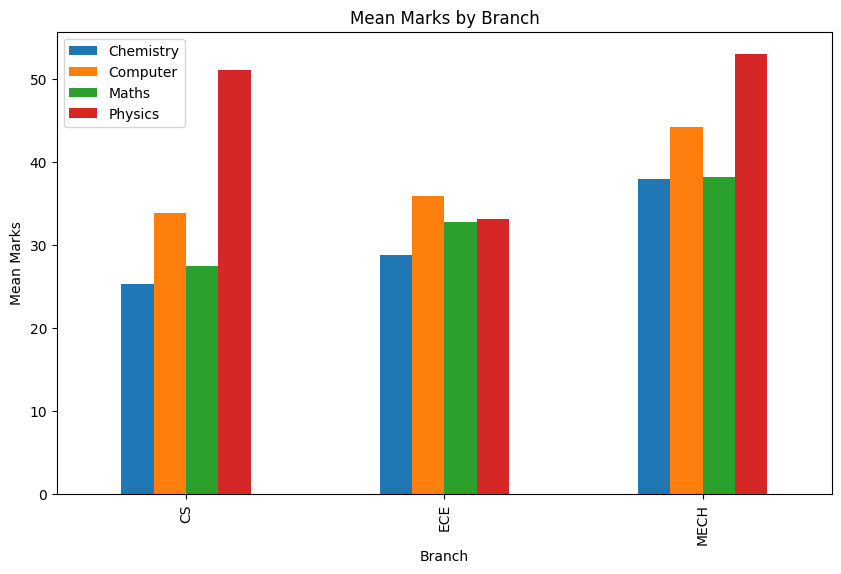

In [159]:
pivot1.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Marks by Branch')
plt.xlabel('Branch')
plt.ylabel('Mean Marks')
plt.show()

In [160]:
df.groupby(['Branch', 'Section'])['Roll No.'].count()['CS']


,Roll No.
Section,
A,7
B,2
C,2


In [161]:
import seaborn as sns

get_dataset_names = sns.get_dataset_names()
print(get_dataset_names)

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


# ------------------------- SECTION : Titanic -------------------------

In [162]:
data = sns.load_dataset('titanic')
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<Axes: xlabel='age', ylabel='fare'>

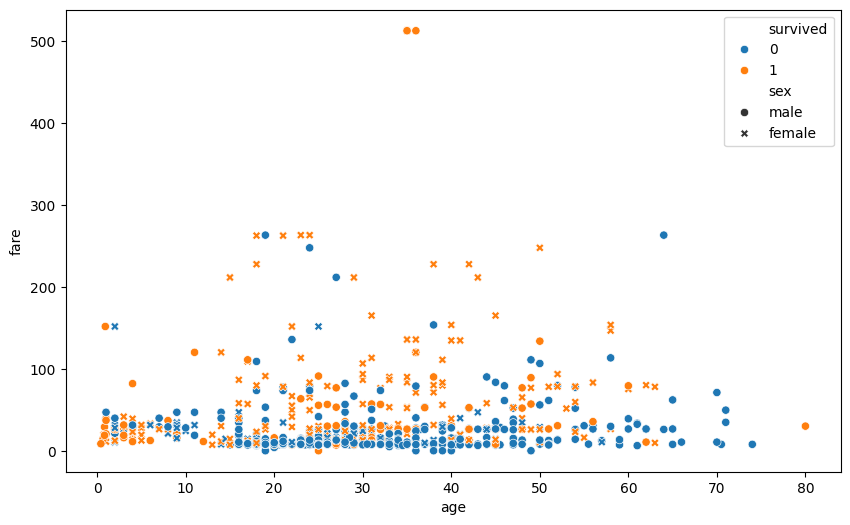

In [163]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='age', y='fare', hue='survived', style='sex')

<Axes: xlabel='age', ylabel='Count'>

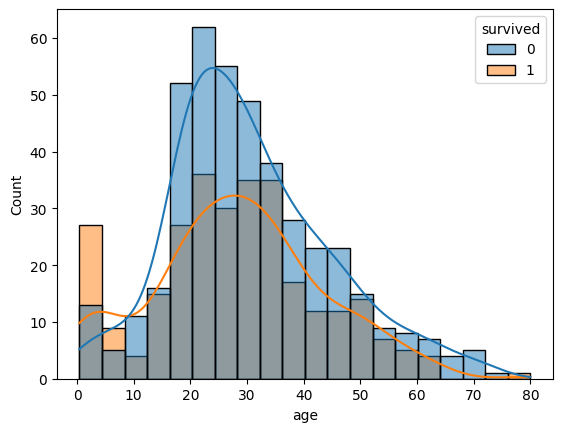

In [164]:
sns.histplot(data=data, x='age', hue='survived', kde=True)

In [165]:
survived_by_sex_class = data.groupby(['sex', 'pclass'])['survived'].sum()
survived_by_sex_class

sex     pclass
female  1         91
        2         70
        3         72
male    1         45
        2         17
        3         47
Name: survived, dtype: int64

# **Conclusion**:
*   Women survived more than males.
*   Higher class means greater survival rates. there is an odd lower survived rates in second class for both sexes.
*   Children/infants survived mostly due to being accompanies by adults. most elderly died. age group of adults 20-35 years survived more than other adults.





# ------------------------- SECTION : Tips -------------------------

In [166]:
data = sns.load_dataset('tips')
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


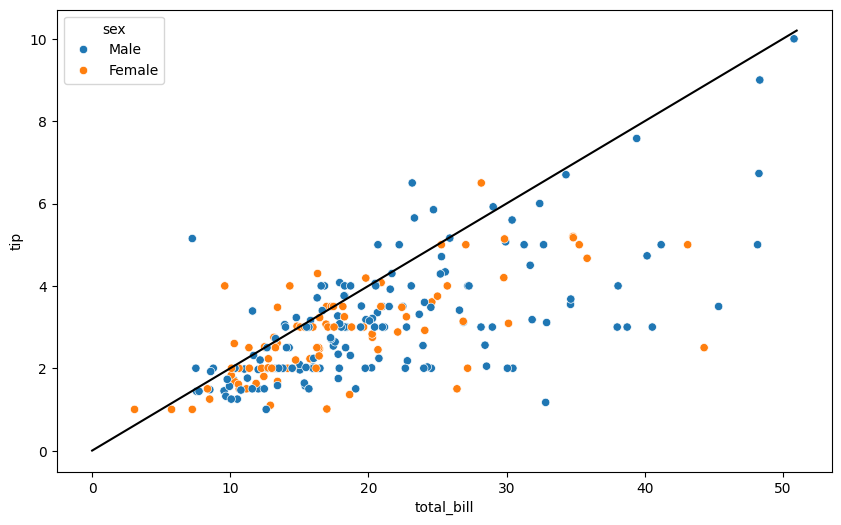

In [167]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='total_bill', y='tip', hue='sex')
x = np.linspace(0, 51, 100)
y = 0.2 * x
plt.plot(x, y, 'k')
plt.show()

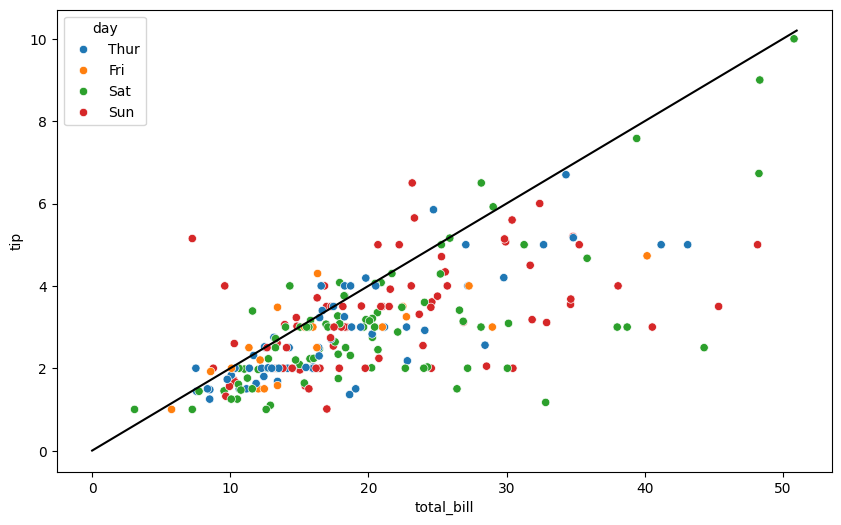

In [168]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='total_bill', y='tip', hue='day')
x = np.linspace(0, 51, 100)
y = 0.2 * x
plt.plot(x, y, 'k')
plt.show()

<ipython-input-169-b5d9a1bf94c7>:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = mod_dat.pivot_table(


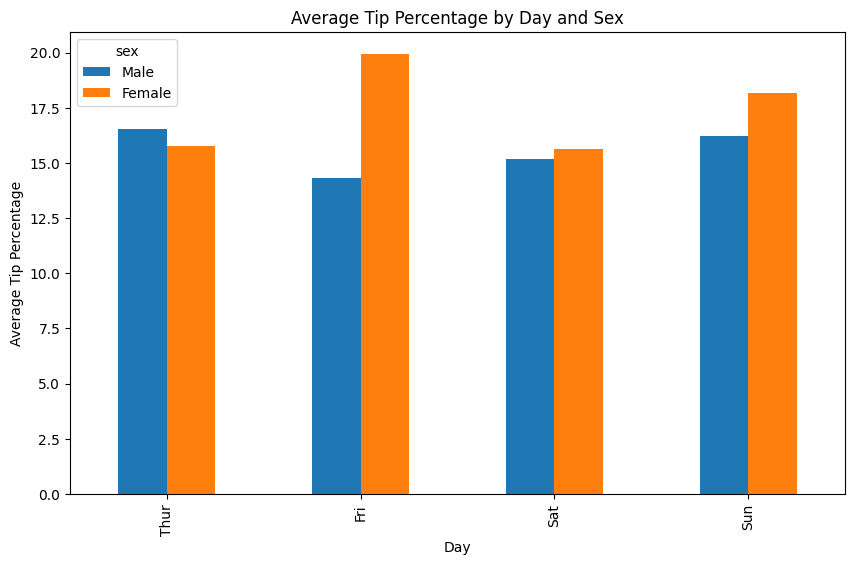

In [169]:
data['tip_percentage'] = (data['tip'] / data['total_bill']) * 100
mod_dat = data[['sex', 'day', 'tip_percentage']]
pivot = mod_dat.pivot_table(
    index='day',
    columns='sex',
    values='tip_percentage',
    aggfunc='mean'
    )

pivot.plot(kind='bar', figsize=(10, 6))
plt.title('Average Tip Percentage by Day and Sex')
plt.xlabel('Day')
plt.ylabel('Average Tip Percentage')
plt.show()

In [170]:
data[['sex', 'smoker']].groupby('sex').value_counts()

<ipython-input-170-089c4286f91c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data[['sex', 'smoker']].groupby('sex').value_counts()


sex     smoker
Male    No        97
        Yes       60
Female  No        54
        Yes       33
Name: count, dtype: int64

Conclusion:
*   Tip rate is standardised around 20% of the bill. With that respect, we observe that customers usually pay less than standard.
*   Women are likely to pay higher tips than men, on average.
*   There are more male smokers than female smokers, yet non-smokers are more in number than smokers for both sexes.
*   Tips are highest on Fridays by women while men tip pretty consistently throughout, on average.





# ------------------------- SECTION : Planets -------------------------

In [171]:
data = sns.load_dataset('planets')
data

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


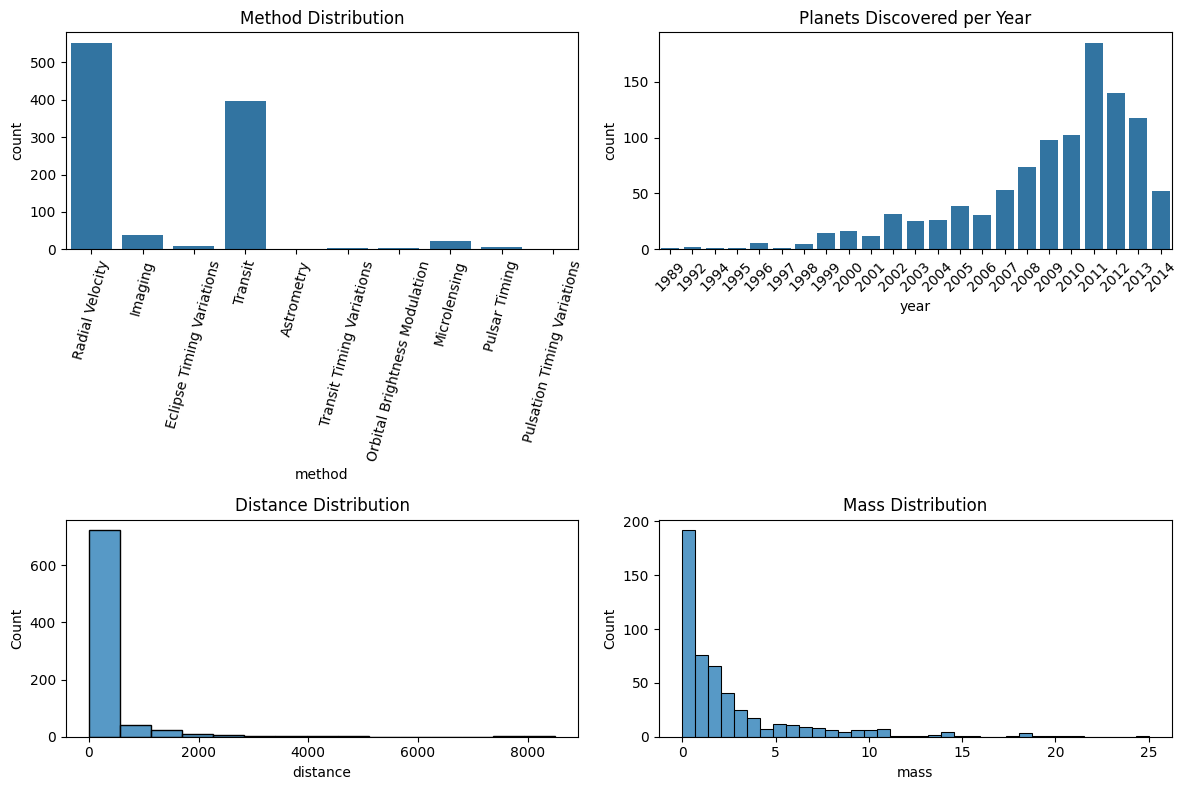

In [173]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot 1: Method Distribution
sns.countplot(x='method', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Method Distribution')
axes[0, 0].tick_params(axis='x', rotation=75)

# Plot 2: Number of planets discovered per year
sns.countplot(x='year', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Planets Discovered per Year')
axes[0, 1].tick_params(axis='x', rotation=45)

#Plot 3: Distance Distribution
sns.histplot(data=data, x='distance', ax = axes[1,0], bins=15)
axes[1,0].set_title('Distance Distribution')

#Plot 4: Mass Distribution
sns.histplot(data=data, x='mass', ax = axes[1,1])
axes[1,1].set_title('Mass Distribution')

plt.tight_layout()
plt.show()

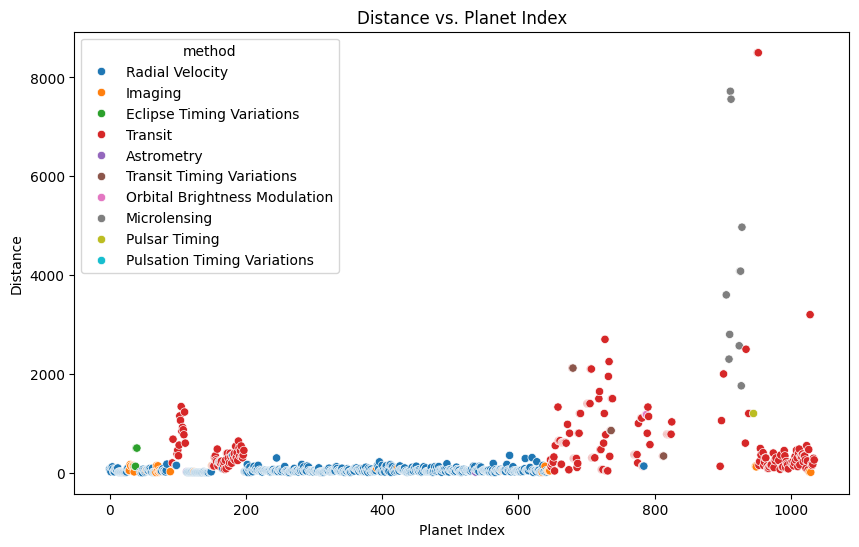

In [174]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x=data.index, y='distance', hue='method')
plt.xlabel('Planet Index')
plt.ylabel('Distance')
plt.title('Distance vs. Planet Index')
plt.show()

Text(0, 0.5, 'Distance')

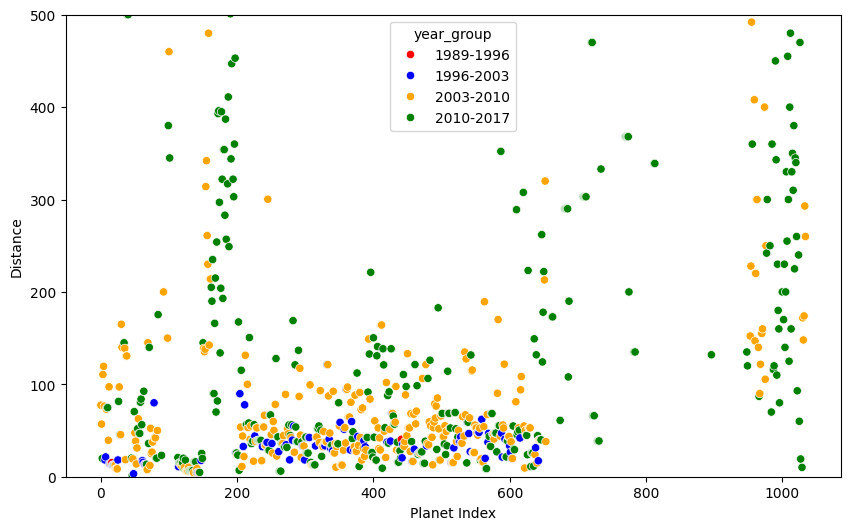

In [176]:
bins = np.arange(1989, 2020, 7)  # Bins of 7 years starting from 1989
labels = [f'{i}-{i + 7}' for i in bins[:-1]]  # Labels for the bins
data['year_group'] = pd.cut(data['year'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=data, x=data.index, y='distance', hue='year_group', palette=['red', 'blue', 'orange', 'green'])
plt.ylim(0, 500)
plt.xlabel('Planet Index')
plt.ylabel('Distance')

# **Conclusion:**
*   Highest number of planet discovery is by Radial Velocity method and by Transit through satellites.
*   Over the years, we have progressive increase in planet discoveries, showing development in astronomical technology.
*   Ideally, a distance range of 1000-2000 parsecs could be travelled and usually the lightweight planets of around less than 10 Jupiter mass units is mostly discovered. Heavier planets of above 25 units is yet to be discovered.
*   We observe that large distances of above 500 parsecs can only be travelled/measured by direct transit, relative method of transit timing variations and microlensing mostly, for planet discovery.
*   Last two decades saw the rise in faraway space travel for discovery beyond 100 parsecs which was impossible in the years of 1989-2000.

